Columns: ['FAMD_1', 'FAMD_2', 'FAMD_3', 'FAMD_4', 'Y']
Shape: (25782, 5)
     FAMD_1    FAMD_2    FAMD_3    FAMD_4         Y
0  0.722159 -0.748604 -2.457741  2.843422  No_Displ
1 -0.131168  2.047659 -0.118618  2.159354  No_Displ
2  5.083731 -1.282638  0.935222 -0.645877  No_Displ
3 -0.687331  1.021406 -2.387299 -2.134329  No_Displ
4  1.634694  0.402081 -3.045378  2.658366  No_Displ
Classes: ['Displ' 'No_Displ']
Train size: (20625, 4)
Test size : (5157, 4)

=== Logistic Regression Evaluation (FAMD) ===
Accuracy : 0.5703
Precision: 0.5726
Recall   : 0.5709
F1 Score : 0.5681

Classification Report:
              precision    recall  f1-score   support

       Displ       0.56      0.65      0.60      2557
    No_Displ       0.59      0.49      0.54      2600

    accuracy                           0.57      5157
   macro avg       0.57      0.57      0.57      5157
weighted avg       0.57      0.57      0.57      5157



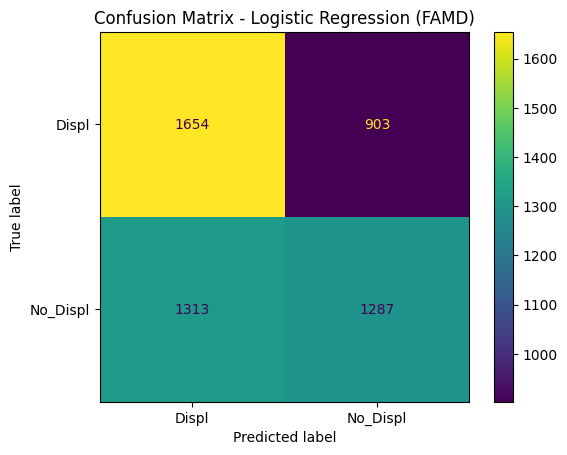


Top Positive Influences:
  Feature  Coefficient
3  FAMD_4     0.083110
1  FAMD_2     0.079841
0  FAMD_1     0.053191
2  FAMD_3    -0.015048

Top Negative Influences:
  Feature  Coefficient
3  FAMD_4     0.083110
1  FAMD_2     0.079841
0  FAMD_1     0.053191
2  FAMD_3    -0.015048


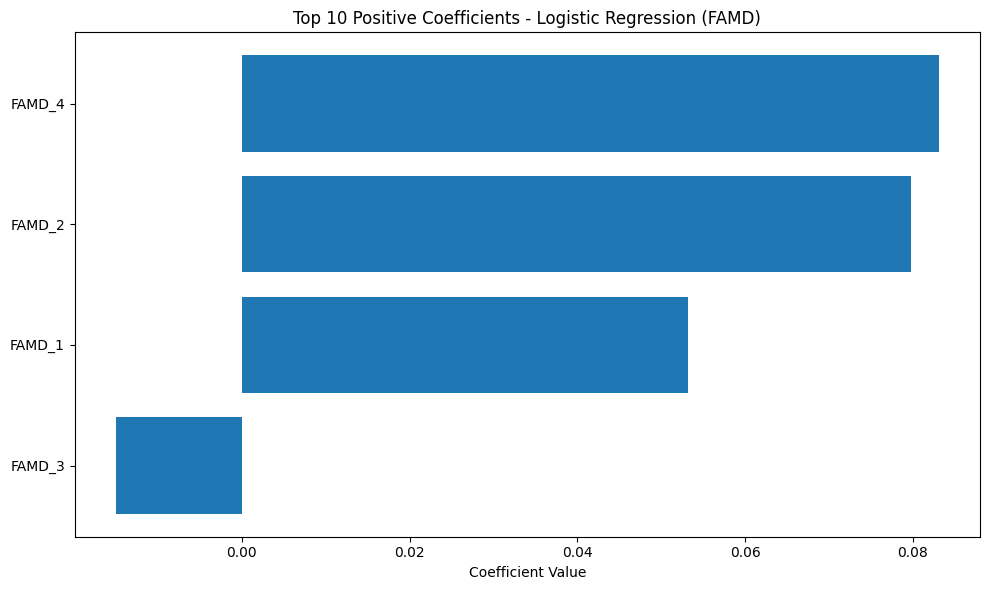

In [1]:
#Logistic Regression
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt

# ==========================
# 1. Load dataset
# ==========================
data_famd = pd.read_csv("/kaggle/input/productdisplaypredistion/data_famd.csv", sep=';')

print("Columns:", data_famd.columns.tolist())
print("Shape:", data_famd.shape)
print(data_famd.head())

# ==========================
# 2. Features / Target
# ==========================
X = data_famd.drop('Y', axis=1).values
y = data_famd['Y']

# Encode target (No_Displ, Displ -> 0,1)
le = LabelEncoder()
y_enc = le.fit_transform(y)

print("Classes:", le.classes_)

# ==========================
# 3. Train / Test Split
# ==========================
X_train, X_test, y_train, y_test = train_test_split(
    X, y_enc, test_size=0.2, random_state=42, stratify=y_enc
)

print("Train size:", X_train.shape)
print("Test size :", X_test.shape)

# ==========================
# 4. Logistic Regression Model
# ==========================
log_reg = LogisticRegression(
    max_iter=1000,
    random_state=42
)

log_reg.fit(X_train, y_train)

# ==========================
# 5. Predictions
# ==========================
y_pred = log_reg.predict(X_test)

# ==========================
# 6. Evaluation
# ==========================
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='macro')
rec = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("\n=== Logistic Regression Evaluation (FAMD) ===")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1 Score : {f1:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# ==========================
# 7. Confusion Matrix
# ==========================
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=le.classes_)
plt.title("Confusion Matrix - Logistic Regression (FAMD)")
plt.show()

# ==========================
# 8. Coefficients (Importance)
# ==========================
coef_df = pd.DataFrame({
    "Feature": data_famd.drop('Y', axis=1).columns,
    "Coefficient": log_reg.coef_[0]
}).sort_values(by="Coefficient", ascending=False)

print("\nTop Positive Influences:")
print(coef_df.head(10))

print("\nTop Negative Influences:")
print(coef_df.tail(10))

# ==========================
# 9. Plot Coefficients
# ==========================
plt.figure(figsize=(10,6))
plt.barh(coef_df["Feature"][:10], coef_df["Coefficient"][:10])
plt.xlabel("Coefficient Value")
plt.title("Top 10 Positive Coefficients - Logistic Regression (FAMD)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


KNN

Columns: ['FAMD_1', 'FAMD_2', 'FAMD_3', 'FAMD_4', 'Y']
Shape: (25782, 5)
     FAMD_1    FAMD_2    FAMD_3    FAMD_4         Y
0  0.722159 -0.748604 -2.457741  2.843422  No_Displ
1 -0.131168  2.047659 -0.118618  2.159354  No_Displ
2  5.083731 -1.282638  0.935222 -0.645877  No_Displ
3 -0.687331  1.021406 -2.387299 -2.134329  No_Displ
4  1.634694  0.402081 -3.045378  2.658366  No_Displ
Classes: ['Displ' 'No_Displ']
Train size: (20625, 4)
Test size : (5157, 4)

=== KNN Evaluation (FAMD) ===
Accuracy : 0.8255
Precision: 0.8260
Recall   : 0.8256
F1 Score : 0.8254

Classification Report:
              precision    recall  f1-score   support

       Displ       0.81      0.85      0.83      2557
    No_Displ       0.84      0.81      0.82      2600

    accuracy                           0.83      5157
   macro avg       0.83      0.83      0.83      5157
weighted avg       0.83      0.83      0.83      5157



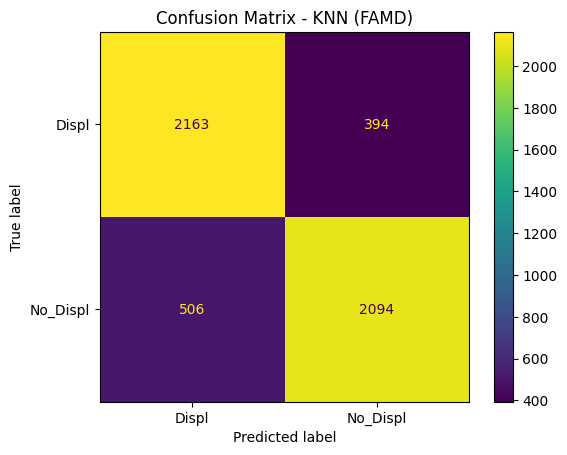

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt

# ==========================
# 1. Load dataset
# ==========================
data_famd = pd.read_csv("/kaggle/input/productdisplaypredistion/data_famd.csv", sep=';')

print("Columns:", data_famd.columns.tolist())
print("Shape:", data_famd.shape)
print(data_famd.head())

# ==========================
# 2. Features / Target
# ==========================
X = data_famd.drop('Y', axis=1).values
y = data_famd['Y']

# Encode target (No_Displ, Displ -> 0,1)
le = LabelEncoder()
y_enc = le.fit_transform(y)

print("Classes:", le.classes_)

# ==========================
# 3. Train / Test Split
# ==========================
X_train, X_test, y_train, y_test = train_test_split(
    X, y_enc, test_size=0.2, random_state=42, stratify=y_enc
)

print("Train size:", X_train.shape)
print("Test size :", X_test.shape)

# ==========================
# 4. Scale Features (important for KNN)
# ==========================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ==========================
# 5. KNN Model
# ==========================
knn = KNeighborsClassifier(
    n_neighbors=5,   # k=5 (you can tune this)
    metric='minkowski',  # Euclidean distance
    p=2
)

knn.fit(X_train_scaled, y_train)

# ==========================
# 6. Predictions
# ==========================
y_pred = knn.predict(X_test_scaled)

# ==========================
# 7. Evaluation
# ==========================
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='macro')
rec = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("\n=== KNN Evaluation (FAMD) ===")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1 Score : {f1:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# ==========================
# 8. Confusion Matrix
# ==========================
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=le.classes_)
plt.title("Confusion Matrix - KNN (FAMD)")
plt.show()
